In [29]:
import sys 
import os
sys.path.append(os.path.abspath("/Users/mouginot/work/helpmetric"))
import cymetrichelper as cyh
import pandahelper as pdh


import cymetric as cym
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
from cymetric import graphs as cgr
from cymetric import timeseries as tm

%matplotlib inline

In [30]:
from cymetric.tools import format_nucs, reduce, merge, add_missing_time_step
def SWU(evaler, facilities=()):
    """
    Shape the reduced SWU Data Frame. Applying nuclides/facilities selection when required.

    Parameters
    ----------
    evaler : evaler
    facilities :  of the facility
    nucs :  of nuclide to select.
    """

    # Get inventory table
    df = evaler.eval('TimeSeriesEnrichmentSWU')
    agents = evaler.eval('AgentEntry')

    rdc_table = []  # because we want to get rid of the nuclide asap
 
    if len(facilities) != 0:
        agents = agents[agents['Prototype'].isin(facilities)]
        rdc_table.append(['AgentId', agents['AgentId'].tolist()])

    df = reduce(df, rdc_table)

    base_col = ['SimId', 'AgentId']
    added_col = base_col + ['Prototype']
    df = merge(df, base_col, agents, added_col)

    df = df[['Time', 'Value']].groupby(['Time']).sum()
    df.reset_index(inplace=True)
    return df



In [31]:
file = "civ_mil_A2/main.sqlite"
db_ = cym.dbopen(file)
ev_ = cym.Evaluator(db=db_, write=False)


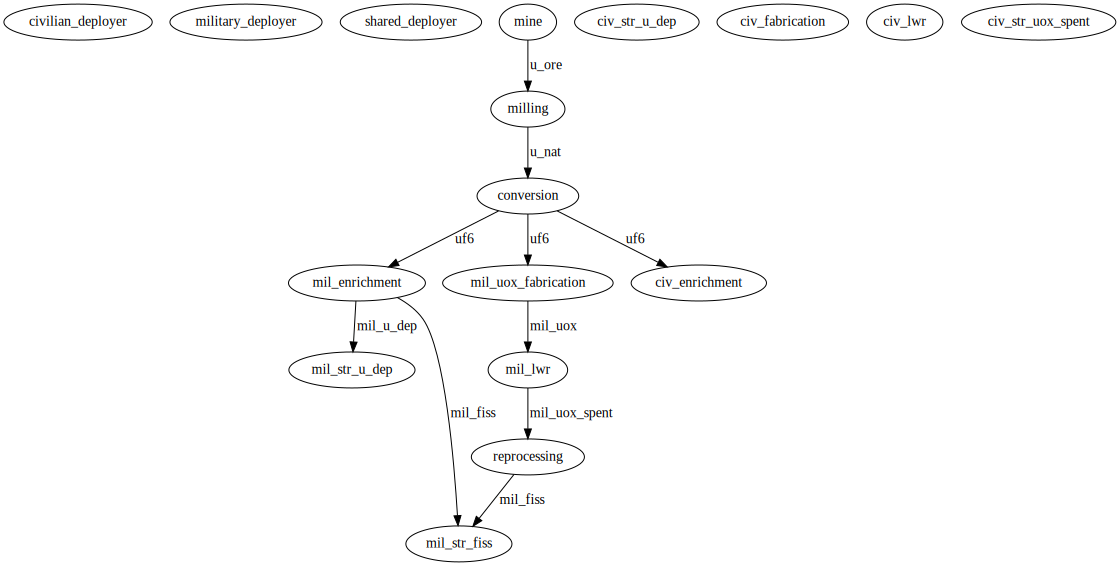

In [32]:
cgr.flow_graph(evaler=ev_, label='com', stop=121)


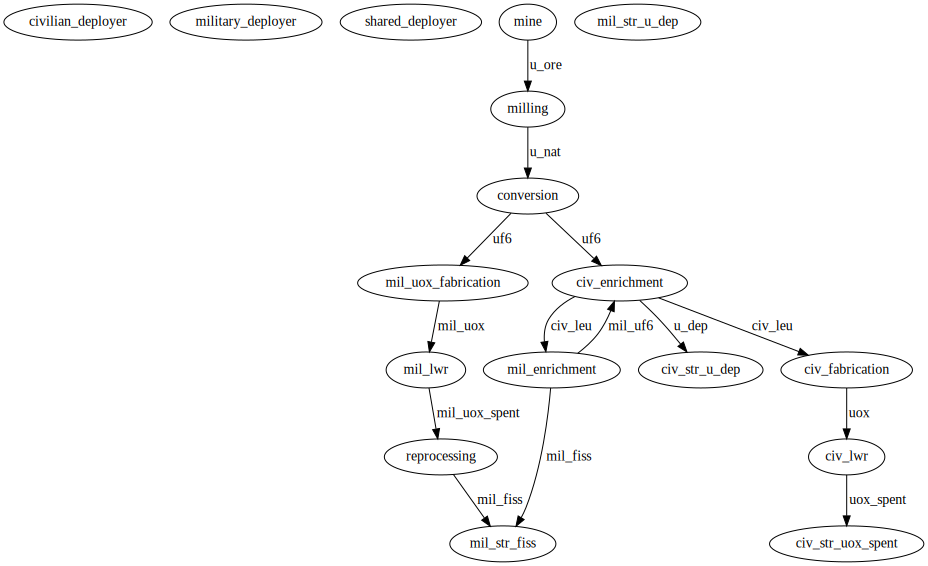

In [33]:
cgr.flow_graph(evaler=ev_, label='com', start=122)



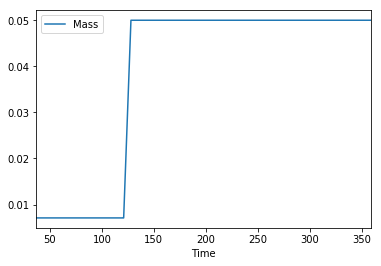

In [34]:
cyh.TransFrac(ev=ev_, rec=['mil_enrichment'], nucs2=['235U'], nucs1=['238U']).dropna().plot(x='Time', y='Mass')


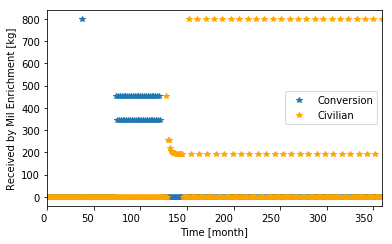

In [35]:
trans_mil_enrich_conversion = cyh.Trans(ev=ev_, send=['conversion'],rec=['mil_enrichment']).dropna()
trans_civ_enrich_mil = cyh.Trans(ev=ev_, send=['civ_enrichment'],rec=['mil_enrichment']).dropna()


ax = trans_mil_enrich_conversion.plot(subplots=True, x='Time', y='Mass', label='Conversion', style='*')
trans_civ_enrich_mil.plot(subplots=True, color='orange', x='Time', y='Mass', ax=ax, label='Civilian', style='*')
plt.ylabel('Received by Mil Enrichment [kg]')
plt.xlabel('Time [month]')

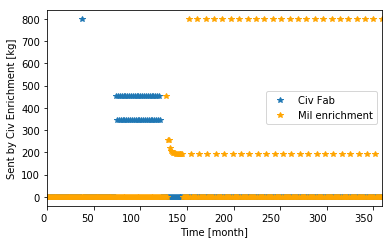

In [36]:
trans_civ_enrich_fab = cyh.Trans(ev=ev_, send=['civ_enrichment'],rec=['civ_fabrication']).dropna()
trans_civ_enrich_mil = cyh.Trans(ev=ev_, send=['civ_enrichment'],rec=['mil_enrichment']).dropna()

ax = trans_mil_enrich_conversion.plot(subplots=True, x='Time', y='Mass', label='Civ Fab', style='*')
trans_civ_enrich_mil.plot(subplots=True, color='orange', x='Time', y='Mass', ax=ax, label='Mil enrichment', style='*')
plt.ylabel('Sent by Civ Enrichment [kg]')
plt.xlabel('Time [month]')

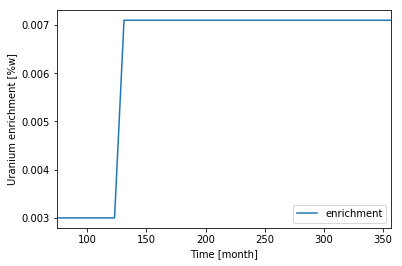

In [37]:
mil_feed_enrich = cyh.TransFrac(ev=ev_, send=['mil_enrichment'], rec=['mil_str_u_dep','civ_enrichment'], nucs2=['235U'], nucs1=['238U']).dropna()
mil_feed_enrich.plot(x='Time', y='Mass', label='enrichment')
plt.ylabel('Uranium enrichment [%w]')
plt.xlabel('Time [month]')

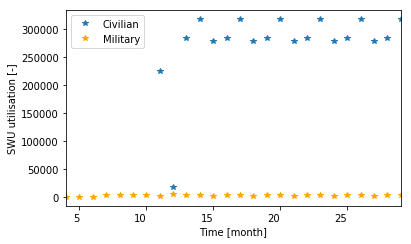

In [38]:
SWU_civ = SWU(ev_, facilities=['civ_enrichment'])
SWU_mil = SWU(ev_, facilities=['mil_enrichment'])
SWU_civ = SWU_civ[SWU_civ['Value']<1e50]

ax = cyh.month2year(SWU_civ, 1, 12, 'Value').plot(subplots=True, x='Time', y='Value', style='*', label='Civilian')

cyh.month2year(SWU_mil[SWU_mil['Value']<1e50], 1, 12, 'Value').plot(subplots=True, ax=ax, x='Time', y='Value', style='*', color='orange', label='Military')
plt.ylabel('SWU utilisation [-]')
plt.xlabel('Time [month]')

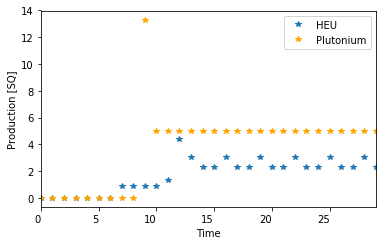

In [45]:
heu_prod = tm.transactions(ev_, senders = ['mil_enrichment'], receivers=['mil_str_fiss'])
heu_prod['Mass'] *= 1/25.
ax = cyh.month2year(heu_prod, 1, 12).plot(subplots=True, x='Time', y='Mass', style='*', label = 'HEU')


pu_prod = tm.transactions(ev_, senders=['reprocessing'], receivers=['mil_str_fiss'])
pu_prod['Mass'] *= 1/8.
cyh.month2year(pu_prod, 1, 12).plot(subplots=True, color='orange', ax = ax, x='Time', y='Mass', style='*', label='Plutonium')

plt.ylabel('Production [SQ]')


In [40]:
heu_prod = tm.transactions(ev_, senders = ['mil_enrichment'], receivers=['mil_str_fiss'])
heu_prod[heu_prod['Mass']>0]


,Time,Mass
73,73,2.071566
74,74,1.585067
75,75,2.071566
76,76,1.585067
77,77,2.071566
78,78,1.585067
79,79,2.071566
80,80,1.585067
81,81,2.071566
82,82,1.585067


/Users/mouginot/.local/lib/python3.5/site-packages/cymetric/timeseries.py:205: UserWarning: no faciity provided
  warnings.warn(wng_msg, UserWarning)


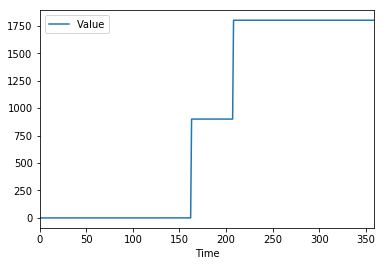

In [41]:
tm.get_power(ev_).plot(x='Time', y='Value')

In [42]:
file_b = "cycle_div_b/main.sqlite"
db_b = cym.dbopen(file_b)
ev_b = cym.Evaluator(db=db_b, write=False)



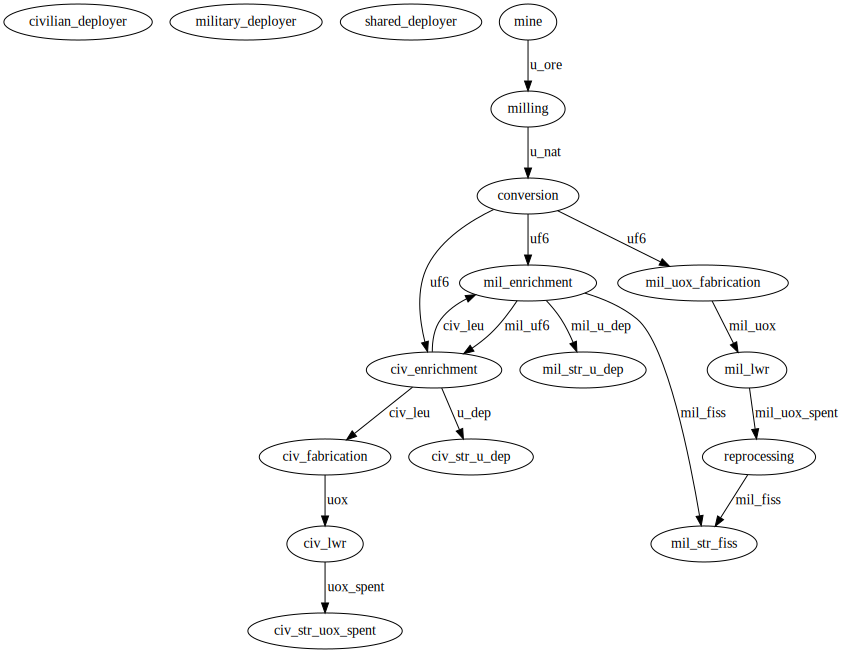

In [43]:
cgr.flow_graph(evaler=ev_b, label='com')



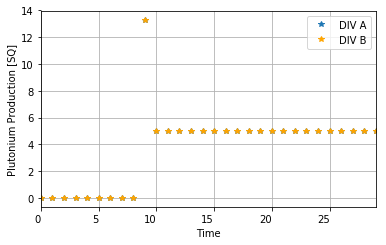

In [44]:

ax = cyh.month2year(pu_prod, 1, 12).plot(subplots=True, x='Time', y='Mass', style='*', label = 'DIV A')


pu_prod_b = tm.transactions(ev_b, senders=['reprocessing'], receivers=['mil_str_fiss'])
pu_prod_b['Mass'] *= 1/8.
cyh.month2year(pu_prod_b, 1, 12).plot(subplots=True, color='orange', ax = ax, x='Time', y='Mass', style='*', label='DIV B')

plt.ylabel('Plutonium Production [SQ]')
plt.grid()